# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata1 = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, mouse_metadata1, on="Mouse ID", how="outer")

# Display the data table for preview
print(combined_data.head(5))
combined_data

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0     a203    Infubinol  Female          20          23          0   
1     a203    Infubinol  Female          20          23          5   
2     a203    Infubinol  Female          20          23         10   
3     a203    Infubinol  Female          20          23         15   
4     a203    Infubinol  Female          20          23         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           48.508468                 0  
2           51.852437                 1  
3           52.777870                 1  
4           55.173336                 1  


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [32]:
# Checking the number of mice.
number = combined_data["Mouse ID"].nunique()
number

249

In [36]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
is_unique = combined_data.duplicated(subset=["Mouse ID","Timepoint"]).sum() == 0
print("Is the data uniquely identified by Mouse ID and Timepoint?", is_unique)

duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
print("Duplicate Mouse IDs:", duplicate_mouse_ids)


Is the data uniquely identified by Mouse ID and Timepoint? False
Duplicate Mouse IDs: ['g989']


In [37]:
# Optional: Get all the data for the duplicate mouse ID.


In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first')

# Verify the number of unique Mouse IDs after cleaning
cleaned_mouse_count = cleaned_data["Mouse ID"].nunique()
print(f"Number of unique Mouse IDs after cleaning: {cleaned_mouse_count}")

# Display the cleaned DataFrame
cleaned_data.head()

Number of unique Mouse IDs after cleaning: 249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [40]:
# Checking the number of mice in the clean DataFrame.
numberofmice =  cleaned_data['Mouse ID'].nunique()
numberofmice

249

## Summary Statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_data = cleaned_data.groupby('Mouse ID')

# Calculate summary statistics
summary_statistics = cleaned_data['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance=lambda x: x.var(),
    Std_Dev=lambda x: x.std(),
    SEM=lambda x: x.sem()
).reset_index()

# Display the summary statistics table
print(summary_statistics)


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


      index  Tumor Volume (mm3)
0      Mean           50.449276
1    Median           48.951421
2  Variance           79.291277
3   Std_Dev            8.904565
4       SEM            0.204933


In [46]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Group data by 'Drug Regimen'
grouped_data = cleaned_data.groupby('Drug Regimen')

# Use describe() for basic statistics and add variance and SEM
summary_statistics = grouped_data['Tumor Volume (mm3)'].describe()

# Add variance and SEM to the summary statistics
summary_statistics['Variance'] = grouped_data['Tumor Volume (mm3)'].var()
summary_statistics['SEM'] = grouped_data['Tumor Volume (mm3)'].sem()

# Keep only the necessary columns
summary_statistics = summary_statistics[['mean', '50%', 'Variance', 'std', 'SEM']]

# Rename the columns for clarity
summary_statistics = summary_statistics.rename(columns={
    'mean': 'Mean',
    '50%': 'Median',
    'std': 'Standard Deviation'
})

# Display the summary statistics table
print(summary_statistics)
# Using the aggregation method, produce the same summary statistics in a single line


                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.393463  50.909965  43.138803            6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

In [50]:
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


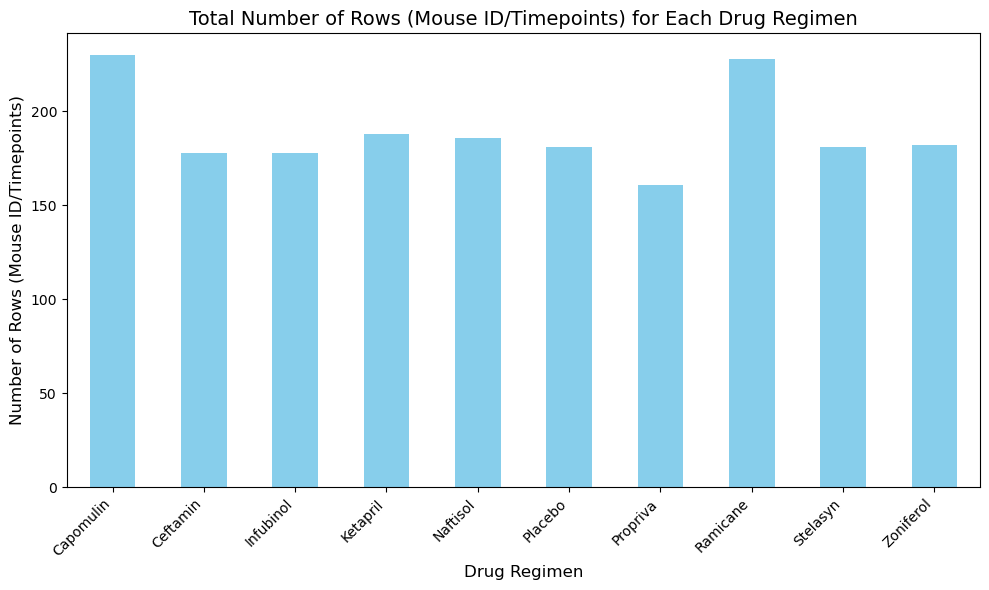

In [51]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_counts = combined_data.groupby('Drug Regimen').size()

# Plot the bar chart
regimen_counts.plot(kind='bar', figsize=(10,6), color='skyblue')

# Set plot labels and title
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen', fontsize=14)
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Number of Rows (Mouse ID/Timepoints)', fontsize=12)

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()

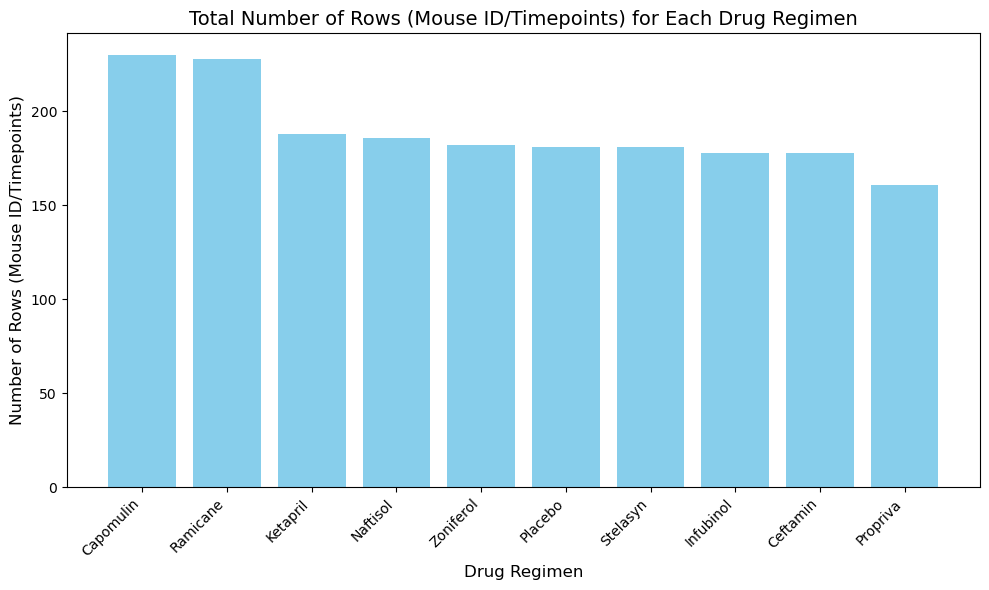

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = combined_data['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue')

# Set the title and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen', fontsize=14)
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Number of Rows (Mouse ID/Timepoints)', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping
plt.tight_layout()

C:\Users\andy8\AppData\Local\Temp\ipykernel_315176\3177845474.py:10: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  gender_counts.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90, cmap='Set2')


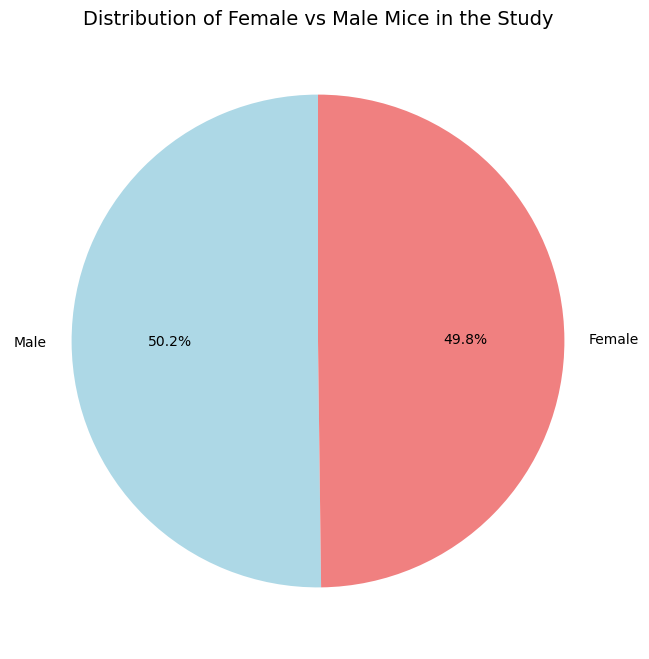

In [53]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

unique_mice = combined_data[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique female and male mice
gender_counts = unique_mice['Sex'].value_counts()

# Create a pie chart using Pandas' plot function
plt.figure(figsize=(8, 8))
gender_counts.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90, cmap='Set2')

# Set the title
plt.title('Distribution of Female vs Male Mice in the Study', fontsize=14)

# Show the plot
plt.ylabel('')  # Hide the y-axis label as it's not necessary for a pie chart
plt.show()


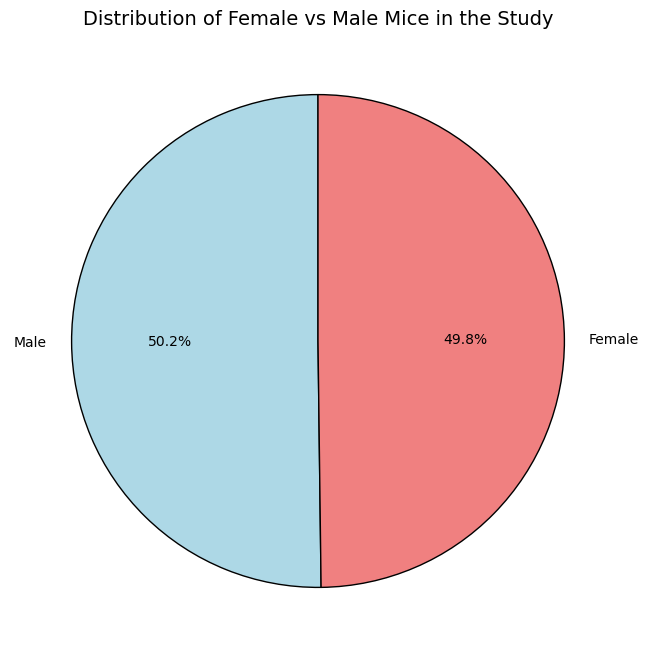

In [54]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
unique_mice = combined_data[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique female and male mice
gender_counts = unique_mice['Sex'].value_counts()

# Create a pie chart using pyplot
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90, wedgeprops={'edgecolor': 'black'})

# Set the title
plt.title('Distribution of Female vs Male Mice in the Study', fontsize=14)

# Show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
last_timepoints = combined_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Step 2: Merge this info with the original data to get the tumor volume at the last timepoint
final_data = pd.merge(last_timepoints, combined_data, how='left', on=['Mouse ID', 'Timepoint'])

# Step 3: Filter for the selected drug regimens (Capomulin, Ramicane, Infubinol, Ceftamin)
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_data_filtered = final_data[final_data['Drug Regimen'].isin(selected_regimens)]

# Step 4: Display the final tumor volume for each mouse in the selected regimens
final_tumor_volume = final_data_filtered[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

# Display the result
print(final_tumor_volume)


    Mouse ID Drug Regimen  Tumor Volume (mm3)
0       a203    Infubinol           67.973419
1       a251    Infubinol           65.525743
3       a275     Ceftamin           62.999356
6       a411     Ramicane           38.407618
7       a444     Ramicane           43.047543
..       ...          ...                 ...
239     y769     Ceftamin           68.594745
240     y793    Capomulin           31.896238
241     y865     Ceftamin           64.729837
245     z578     Ramicane           30.638696
246     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [56]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Step 2: Create an empty list to fill with tumor volume data (for plotting)
tumor_volumes = []

# Step 3: Loop through each treatment regimen
for treatment in treatments:
    # Get tumor volumes for the current treatment
    tumor_data = combined_data[combined_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_volumes.append(tumor_data)
    
    # Step 4: Calculate the IQR for the current treatment
    quartiles = tumor_data.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    
    # Calculate IQR
    iqr = upper_q - lower_q
    
    # Step 5: Determine upper and lower bounds for outliers
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Identify outliers
    outliers = tumor_data[(tumor_data < lower_bound) | (tumor_data > upper_bound)]
    
    # Print outliers for each treatment regimen
    print(f"Outliers for {treatment}:")
    print(outliers)
    print("\n")
    
    # Optionally, you can store IQR, outliers, and bounds if needed for further analysis
    print(f"{treatment} IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("\n")


Outliers for Capomulin:
1391    25.472143
1392    23.343598
Name: Tumor Volume (mm3), dtype: float64


Capomulin IQR: 7.314067135000002
Lower Bound: 26.714832162499995
Upper Bound: 55.9711007025


Outliers for Ramicane:
809    22.050126
Name: Tumor Volume (mm3), dtype: float64


Ramicane IQR: 8.325365415
Lower Bound: 24.1865864625
Upper Bound: 57.488048122500004


Outliers for Infubinol:
Series([], Name: Tumor Volume (mm3), dtype: float64)


Infubinol IQR: 10.002090667500006
Lower Bound: 32.309217298749985
Upper Bound: 72.31757996875001


Outliers for Ceftamin:
Series([], Name: Tumor Volume (mm3), dtype: float64)


Ceftamin IQR: 9.593010457500007
Lower Bound: 32.81891142624998
Upper Bound: 71.19095325625001




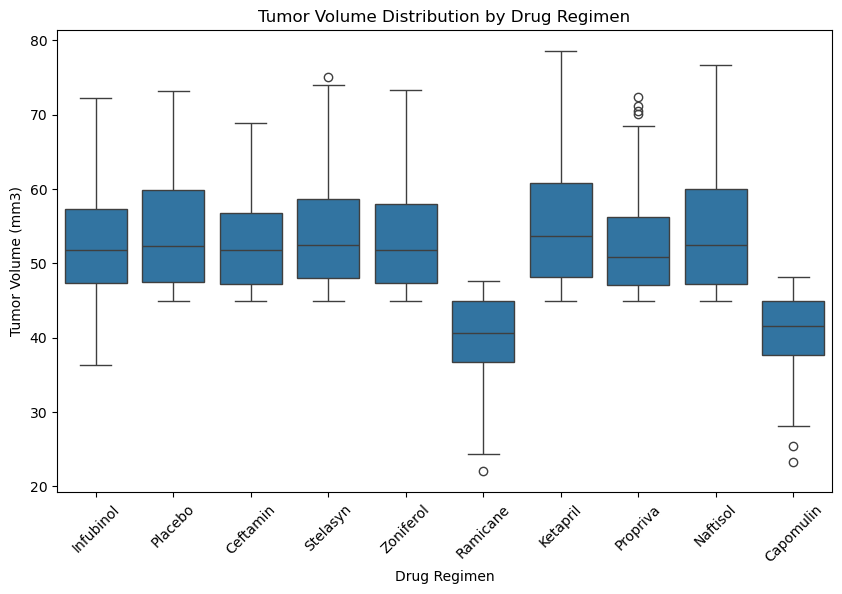

In [59]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10,6))
sns.boxplot(x='Drug Regimen', y='Tumor Volume (mm3)', data=combined_data)

# Set plot title and labels
plt.title('Tumor Volume Distribution by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

## Line and Scatter Plots

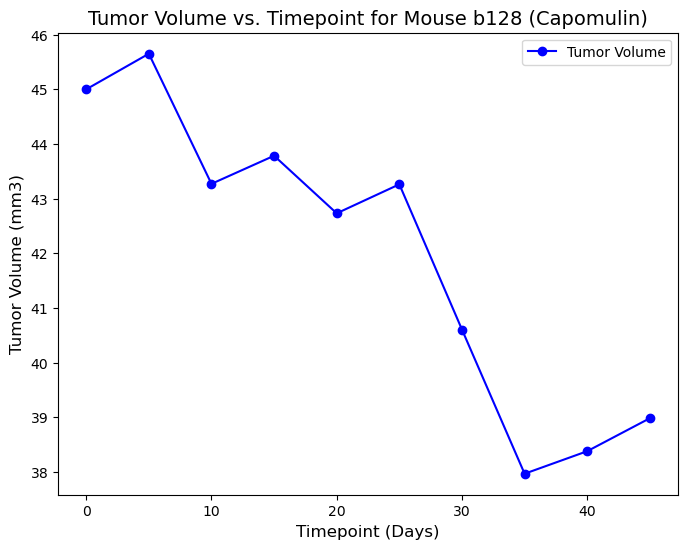

In [60]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

# Select a single mouse (e.g., mouse 'b128' treated with Capomulin)
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'b128']

# Create a line plot of tumor volume vs. time point for this mouse
plt.figure(figsize=(8,6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', label='Tumor Volume')

# Set plot title and labels
plt.title('Tumor Volume vs. Timepoint for Mouse b128 (Capomulin)', fontsize=14)
plt.xlabel('Timepoint (Days)', fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontsize=12)

# Display the plot
plt.legend()
plt.show()

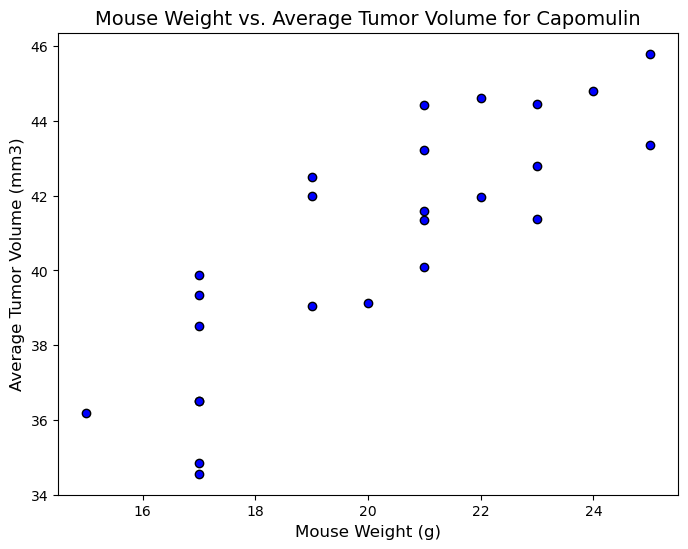

In [61]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the weight data
capomulin_weight = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
avg_tumor_volume_data = pd.merge(avg_tumor_volume, capomulin_weight, on='Mouse ID')

# Create the scatter plot
plt.figure(figsize=(8,6))
plt.scatter(avg_tumor_volume_data['Weight (g)'], avg_tumor_volume_data['Tumor Volume (mm3)'], color='blue', edgecolor='black')

# Set plot title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin', fontsize=14)
plt.xlabel('Mouse Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)

# Display the plot
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8419363424694722
Linear Regression Equation: y = 0.95x + 21.55


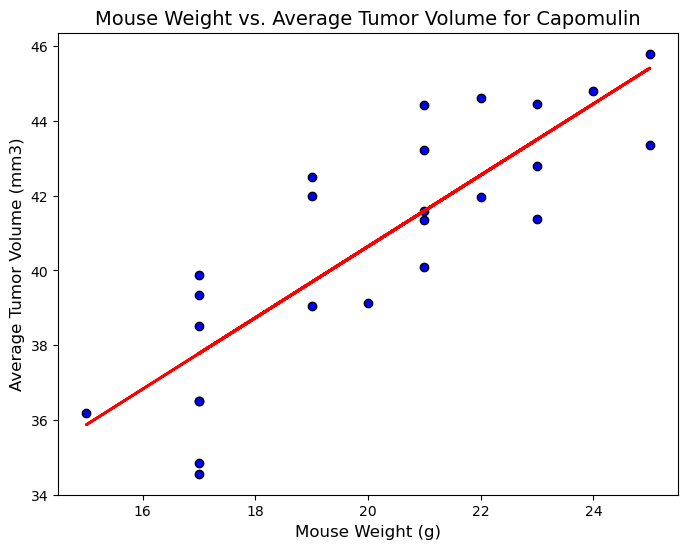

In [63]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt
from scipy import stats
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the weight data
capomulin_weight = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
avg_tumor_volume_data = pd.merge(avg_tumor_volume, capomulin_weight, on='Mouse ID')

# Calculate the correlation coefficient
correlation = avg_tumor_volume_data['Weight (g)'].corr(avg_tumor_volume_data['Tumor Volume (mm3)'])
print(f"Correlation Coefficient: {correlation}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(avg_tumor_volume_data['Weight (g)'], avg_tumor_volume_data['Tumor Volume (mm3)'])

# Print the linear regression results
print(f"Linear Regression Equation: y = {slope:.2f}x + {intercept:.2f}")

# Plot the data points and the linear regression line
plt.figure(figsize=(8,6))
plt.scatter(avg_tumor_volume_data['Weight (g)'], avg_tumor_volume_data['Tumor Volume (mm3)'], color='blue', edgecolor='black')

# Plot the regression line
plt.plot(avg_tumor_volume_data['Weight (g)'], slope * avg_tumor_volume_data['Weight (g)'] + intercept, color='red', lw=2)

# Set plot title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin', fontsize=14)
plt.xlabel('Mouse Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)

# Show the plot
plt.show()